In [4]:
# Task 1.1
import pandas as pd

In [5]:
df = pd.read_csv("car_prices.csv")

In [6]:
print("First 5 rows of the dataset:")
(df.head())

First 5 rows of the dataset:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
print("Data types of each column:")
(df.dtypes)

Data types of each column:


year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [8]:
print("\nNumber of records (rows, columns):")
df.shape


Number of records (rows, columns):


(558837, 16)

In [9]:
# Task 1.2
print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (558837, 16)


In [10]:
print("\nColumn names in the dataset:")
print(df.columns.tolist())


Column names in the dataset:
['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


In [11]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [12]:
# Task 1.3
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [13]:
# Task 1.3
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [14]:
import matplotlib.pyplot as plt

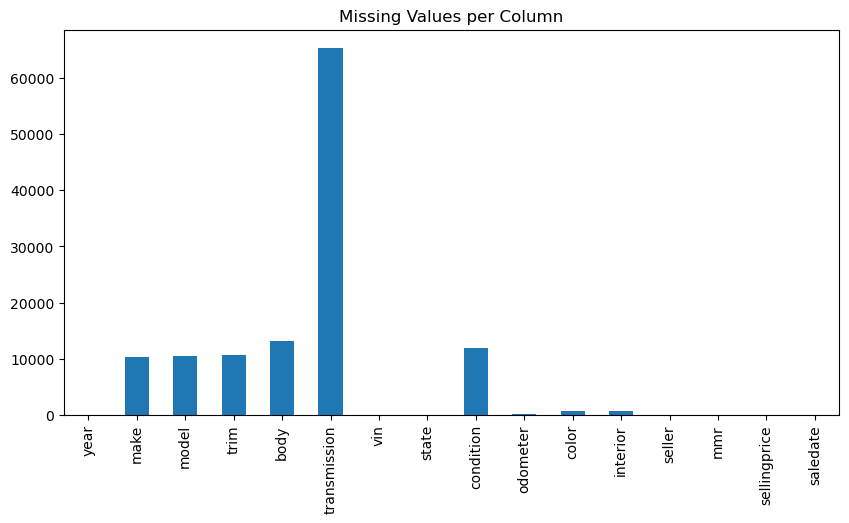

In [15]:
df.isnull().sum().plot(kind='bar', figsize=(10,5), title="Missing Values per Column")
plt.show()

In [16]:
num_cols = ['condition', 'odometer', 'mmr', 'sellingprice']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [17]:
cat_cols = ['make', 'model', 'trim', 'body', 'color', 'interior', 'saledate']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
df['vin'] = df['vin'].fillna('Unknown')

In [19]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
year                0
make                0
model               0
trim                0
body                0
transmission    65352
vin                 0
state               0
condition           0
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [20]:
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [21]:
# Task 2.1
avg_price = df['sellingprice'].mean()
min_price = df['sellingprice'].min()
max_price = df['sellingprice'].max()

print("Average car price:", avg_price)
print("Minimum car price:", min_price)
print("Maximum car price:", max_price)

Average car price: 13611.326356343621
Minimum car price: 1.0
Maximum car price: 230000.0


In [22]:
# Task 2.2
unique_colors = df['color'].unique()

print("Unique car colors are:")
print(unique_colors)

Unique car colors are:
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872' '12655'
 '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887' '9837'
 '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562' '5001']


In [23]:
df['color'] = df['color'].apply(lambda x: x if str(x).isalpha() else 'Unknown')

In [24]:
print("Cleaned unique car colors:")
print(sorted(df['color'].unique()))

Cleaned unique car colors:
['Unknown', 'beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'green', 'lime', 'orange', 'pink', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow']


In [25]:
# Task 2.3
unique_brands = df['make'].nunique()
print("Number of unique car brands:", unique_brands)

Number of unique car brands: 96


In [26]:
unique_models = df['model'].nunique()
print("Number of unique car models:", unique_models)

Number of unique car models: 973


In [27]:
# Task 2.4
expensive_cars = df[df['sellingprice'] > 165000]

In [28]:
print("Number of cars with selling price > 165,000:", expensive_cars.shape[0])
print("\nDetails of these cars:")
display(expensive_cars)

Number of cars with selling price > 165,000: 7

Details of these cars:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


In [29]:
# Task 2.5
top_models = df['model'].value_counts().head(5)

In [30]:
print("Top 5 most frequently sold car models:")
print(top_models)

Top 5 most frequently sold car models:
model
Altima    29748
F-150     14479
Fusion    12946
Camry     12545
Escape    11861
Name: count, dtype: int64


In [31]:
# Task 2.6
avg_price_by_brand = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

In [32]:
print("Average selling price by brand (highest to lowest):")
print(avg_price_by_brand)

Average selling price by brand (highest to lowest):
make
Rolls-Royce    153488.235294
Ferrari        127210.526316
Lamborghini    112625.000000
Bentley         74367.672414
airstream       71000.000000
                   ...      
dodge tk          550.000000
Geo               528.947368
dot               500.000000
ford truck        483.333333
Daewoo            400.000000
Name: sellingprice, Length: 96, dtype: float64


In [33]:
# Task 2.7
min_price_by_interior = df.groupby('interior')['sellingprice'].min().sort_values()

In [34]:
print("Minimum selling price for each interior type:")
print(min_price_by_interior)

Minimum selling price for each interior type:
interior
black           1.0
gray            1.0
green         100.0
beige         100.0
tan           100.0
blue          150.0
silver        150.0
—             150.0
burgundy      175.0
red           200.0
purple        200.0
brown         200.0
gold          250.0
white         350.0
off-white     900.0
orange       1200.0
yellow       3100.0
Name: sellingprice, dtype: float64


In [35]:
# Task 2.8
highest_odometer_per_year = df.groupby('year')['odometer'].max().sort_values(ascending=False)

In [36]:
print("Highest odometer reading per year (from highest to lowest):")
print(highest_odometer_per_year)

Highest odometer reading per year (from highest to lowest):
year
1997    999999.0
1996    999999.0
2014    999999.0
2013    999999.0
1998    999999.0
1999    999999.0
1993    999999.0
2010    999999.0
2009    999999.0
2012    999999.0
2008    999999.0
2007    999999.0
2005    999999.0
2006    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2011    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64


In [37]:
# Task 2.9
df['car_age'] = 2025 - df['year']

In [38]:
print("Car age column added:")
print(df[['year', 'car_age']].head())

Car age column added:
   year  car_age
0  2015       10
1  2015       10
2  2014       11
3  2015       10
4  2014       11


In [39]:
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [40]:
# Task 2.10
filtered_cars = df[(df['condition'] >= 48) & (df['odometer'] > 90000)]

In [41]:
print("Number of cars with condition >= 48 and odometer > 90,000:", filtered_cars.shape[0])

Number of cars with condition >= 48 and odometer > 90,000: 746


In [42]:
# Task 2.11
newer_cars = df[df['year'] > 2013]

In [43]:
avg_price_by_state = newer_cars.groupby('state')['sellingprice'].mean().sort_values(ascending=False)

In [44]:
print("Average selling price by state for newer cars (year > 2013):")
print(avg_price_by_state)

Average selling price by state for newer cars (year > 2013):
state
oh                   28020.221053
ab                   25204.255319
nj                   24237.063973
on                   22962.560386
qc                   22722.938144
                         ...     
3vwd17aj5fm225953    13200.000000
3vwd17aj8fm239622    13200.000000
3vwd17aj3fm276741    13200.000000
3vwd17aj4fm201708    13200.000000
ok                   10600.000000
Name: sellingprice, Length: 64, dtype: float64


In [45]:
#Task 2.12
threshold = df['condition'].quantile(0.80)

In [46]:
excellent_cars = df[df['condition'] >= threshold]

In [47]:
value_brands = excellent_cars.groupby('make')['sellingprice'].mean().sort_values()

In [48]:
print("Top 20% excellent condition cars - Brands with lowest average price (best value for money):")
print(value_brands.head(10))

Top 20% excellent condition cars - Brands with lowest average price (best value for money):
make
Isuzu         1125.000000
Oldsmobile    1910.000000
honda         4233.333333
Saturn        5700.406504
subaru        6200.000000
chrysler      6225.000000
smart         6835.759494
mazda         7275.000000
Pontiac       7686.824324
Saab          7711.111111
Name: sellingprice, dtype: float64


Correlation matrix:
                  year  condition  odometer       mmr  sellingprice   car_age
year          1.000000   0.323564 -0.772415  0.596594      0.586474 -1.000000
condition     0.323564   1.000000 -0.304580  0.273153      0.313120 -0.323564
odometer     -0.772415  -0.304580  1.000000 -0.587958     -0.582267  0.772415
mmr           0.596594   0.273153 -0.587958  1.000000      0.983634 -0.596594
sellingprice  0.586474   0.313120 -0.582267  0.983634      1.000000 -0.586474
car_age      -1.000000  -0.323564  0.772415 -0.596594     -0.586474  1.000000


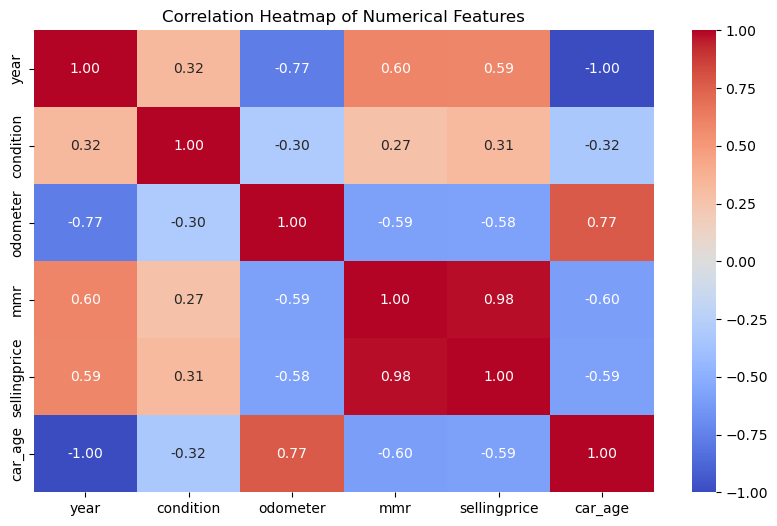

In [49]:
# Task 3.1
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
print("Correlation matrix:")
print(corr_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

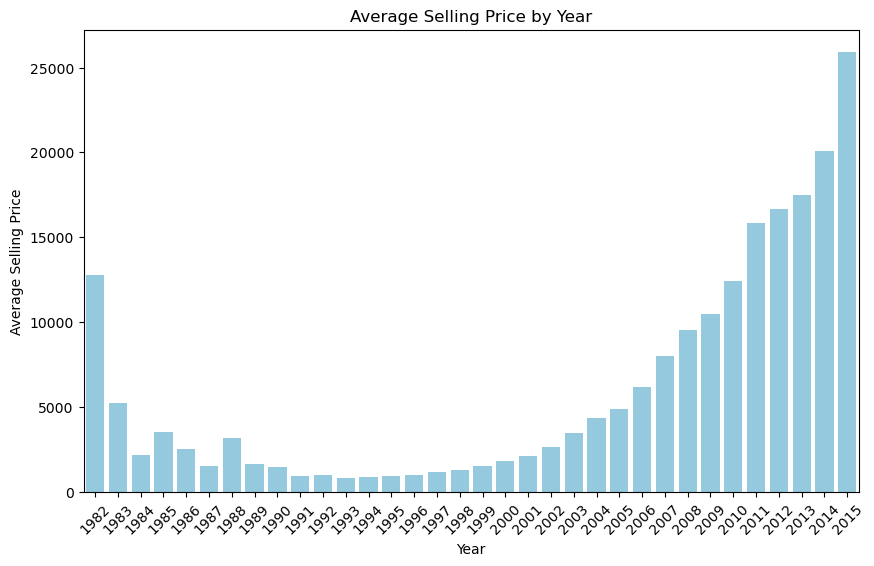

In [50]:
# Task 3.2
avg_price_by_year = df.groupby('year')['sellingprice'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_year.index, y=avg_price_by_year.values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Average Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.show()

In [51]:
#Task 3.2 Insight (Avg Selling Price by Year)

#💡 Insight:

#Generally, newer cars (higher year) have higher average selling prices, which makes sense because they are less worn and have newer features.

#Occasional dips or bumps may appear due to certain high-selling models in a specific year or data inconsistencies.

#👉 Recommendation:

#Focus pricing strategies on newer cars if targeting higher margins.

#Consider investigating years with price dips for data quality or market trends.

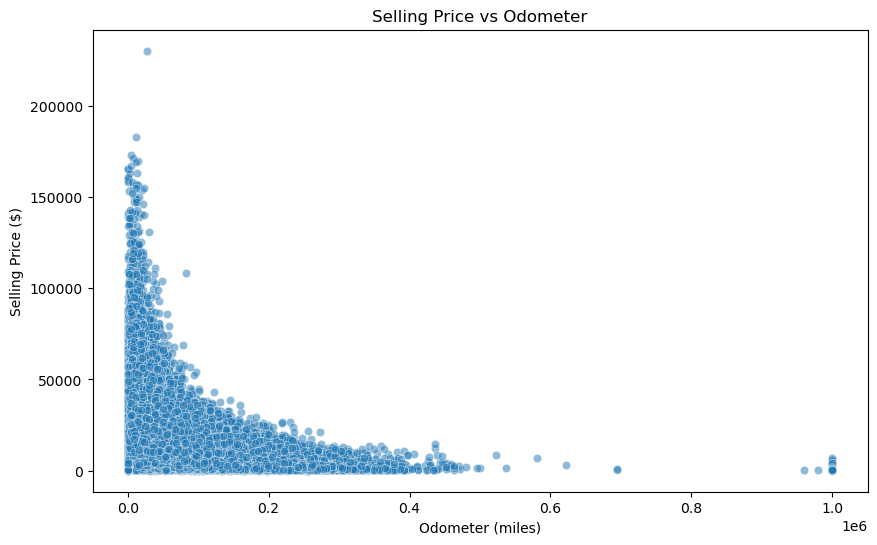

In [52]:
#Task 3.3
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.5)
plt.title('Selling Price vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price ($)')
plt.show()

In [53]:
#Task 3.3 Insight (Selling Price vs Odometer)
#💡 Insight:

#A clear negative correlation exists: the more miles driven (higher odometer), the lower the selling price.

#Few outliers exist where high mileage cars still sell at high prices (likely luxury or special cases).

#👉 Recommendation:

#Odometer is a strong predictor of price → should be a key feature in any price prediction model.

#Consider flagging outliers for manual review.

In [54]:
#Task 3.4
# Count number of cars sold in each state
cars_per_state = df['state'].value_counts()

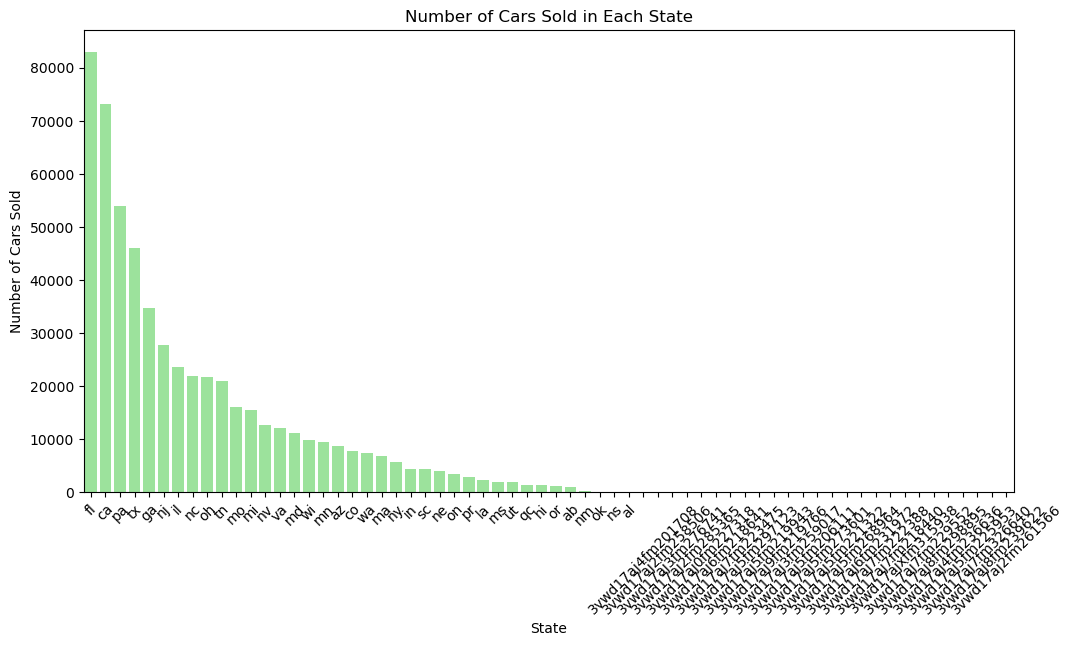

In [55]:
# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=cars_per_state.index, y=cars_per_state.values, color="lightgreen")
plt.xticks(rotation=45)
plt.title('Number of Cars Sold in Each State')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.show()

In [56]:
# Print top 3 states
print("Top 3 states with highest car sales:")
print(cars_per_state.head(3))

Top 3 states with highest car sales:
state
fl    82945
ca    73148
pa    53907
Name: count, dtype: int64


In [57]:
# Task 3.5
# Step 1: Create condition score ranges (bins of size 5)
bins = range(0, int(df['condition'].max()) + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df['condition_range'] = pd.cut(df['condition'], bins=bins, labels=labels, right=False)

In [58]:
# Step 2: Average selling price by condition range
avg_price_by_condition = df.groupby('condition_range')['sellingprice'].mean()

C:\Users\upadh\AppData\Local\Temp\ipykernel_18064\1698446935.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = df.groupby('condition_range')['sellingprice'].mean()


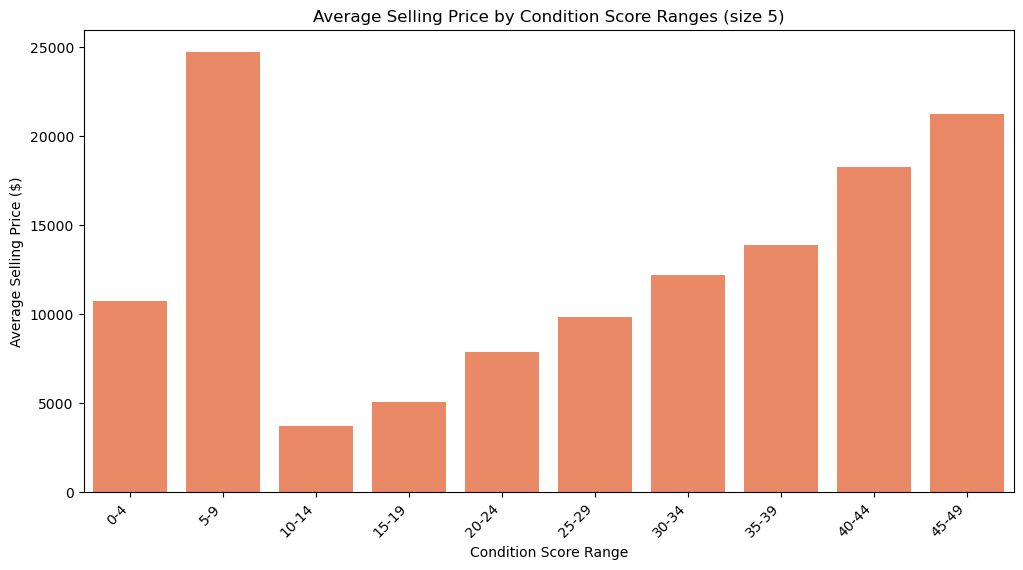

In [59]:
# Step 3: Plot bar graph
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_condition.index, y=avg_price_by_condition.values, color="coral")
plt.xticks(rotation=45, ha='right')
plt.title('Average Selling Price by Condition Score Ranges (size 5)')
plt.xlabel('Condition Score Range')
plt.ylabel('Average Selling Price ($)')
plt.show()

In [65]:
#Task 3.5 Insight (Avg Price by Condition Range of size 5)
#💡 Insight:

#As condition improves (higher score ranges), the average selling price generally increases.

#The highest condition range doesn’t always have the highest price (likely due to fewer data points or pricing anomalies).

#👉 Recommendation:

#Prioritize listing cars in condition ranges above 45 for higher profitability.

#Investigate any anomalies where high condition cars have unexpectedly low prices.

In [60]:
# Task 3.6
# Step 1: Create condition score ranges of size 10
bins = range(0, int(df['condition'].max()) + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['condition_range_10'] = pd.cut(df['condition'], bins=bins, labels=labels, right=False)

In [61]:
# Step 2: Count number of cars in each condition range
cars_count_by_condition = df['condition_range_10'].value_counts().sort_index()

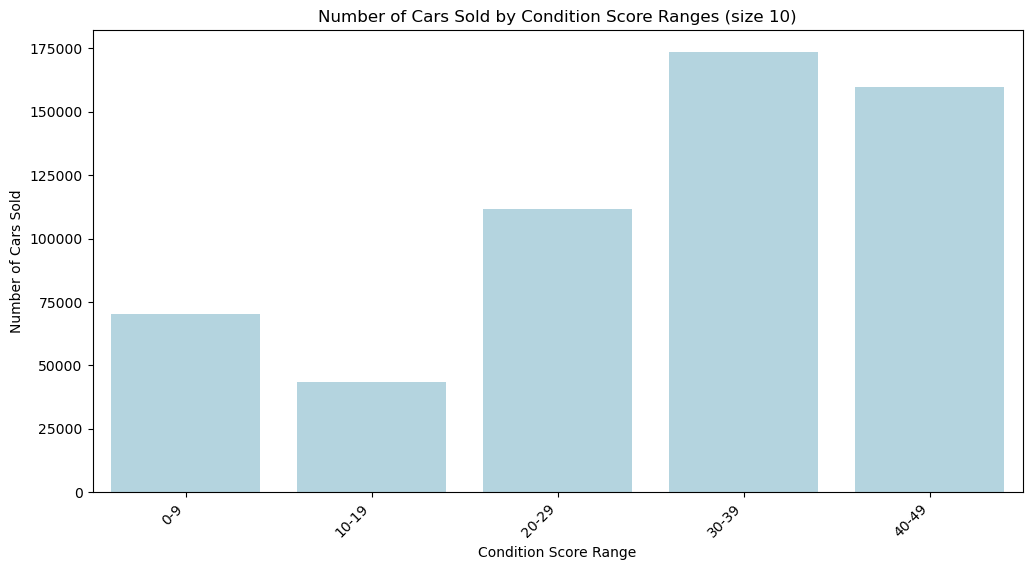

In [62]:
# Step 3: Plot bar graph
plt.figure(figsize=(12,6))
sns.barplot(x=cars_count_by_condition.index, y=cars_count_by_condition.values, color="lightblue")
plt.xticks(rotation=45, ha='right')
plt.title('Number of Cars Sold by Condition Score Ranges (size 10)')
plt.xlabel('Condition Score Range')
plt.ylabel('Number of Cars Sold')
plt.show()

In [68]:
#Task 3.6 Insight (Number of Cars Sold by Condition Range of size 10)

#💡 Insight:

#Most cars are concentrated in the middle condition ranges (30–39, 40–49).

#Very few cars in the extreme low (0–9) or very high (90–99) condition ranges.

#👉 Recommendation:

#Focus on managing mid-condition cars for bulk sales.

#High condition cars are rare → may be high-margin but should be carefully inspected.

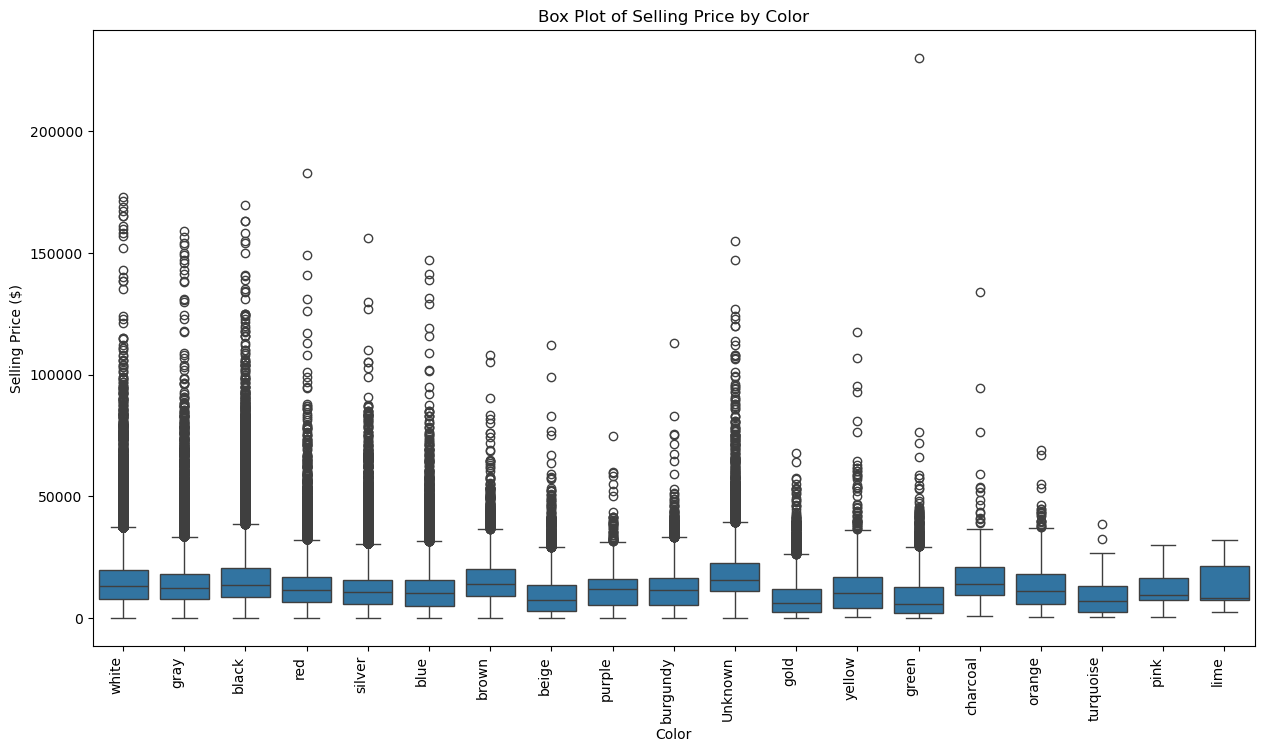

In [63]:
#Task 3.7
plt.figure(figsize=(15,8))
sns.boxplot(x='color', y='sellingprice', data=df)
plt.xticks(rotation=90, ha='right')
plt.title('Box Plot of Selling Price by Color')
plt.xlabel('Color')
plt.ylabel('Selling Price ($)')
plt.show()

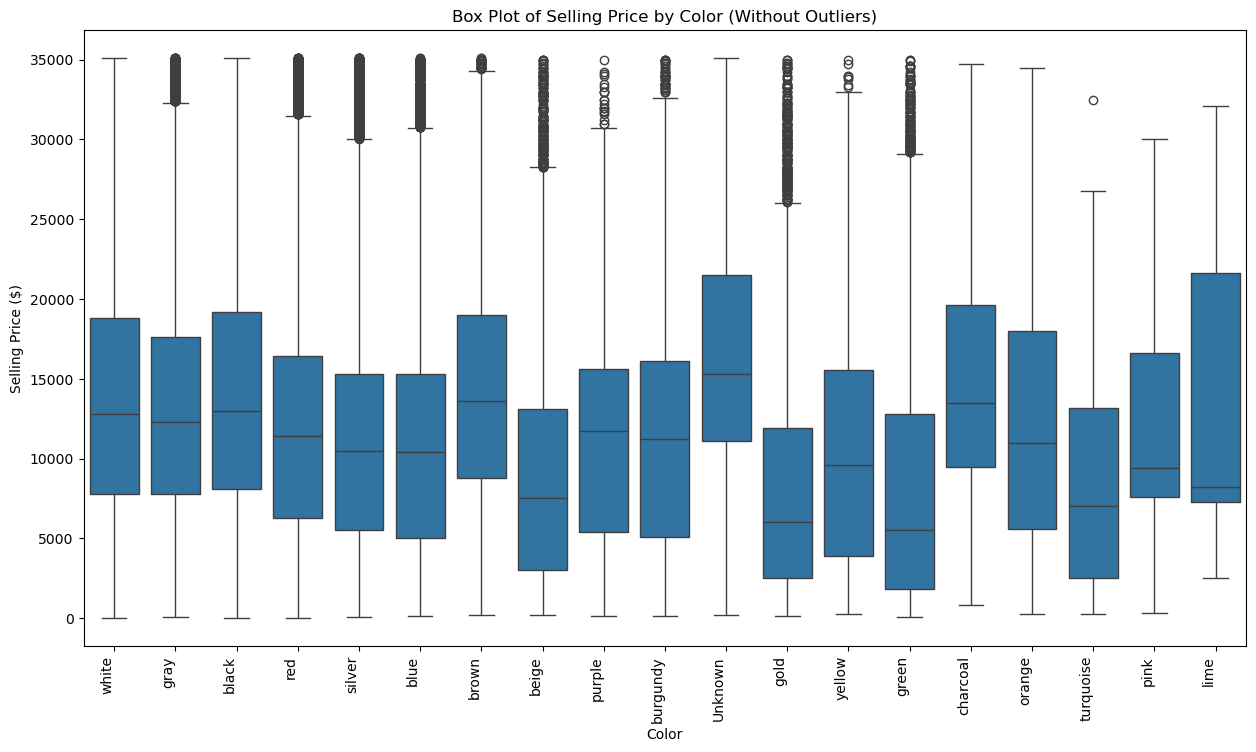

In [64]:
#Remove Outliers & Plot Again
# Calculate IQR
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

# Filter to remove outliers
filtered_df = df[(df['sellingprice'] >= (Q1 - 1.5 * IQR)) & (df['sellingprice'] <= (Q3 + 1.5 * IQR))]

# Plot box plot again without outliers
plt.figure(figsize=(15,8))
sns.boxplot(x='color', y='sellingprice', data=filtered_df)
plt.xticks(rotation=90, ha='right')
plt.title('Box Plot of Selling Price by Color (Without Outliers)')
plt.xlabel('Color')
plt.ylabel('Selling Price ($)')
plt.show()

In [69]:
#Task 3.7 Insight (Selling Price by Color)

#💡 Insight:

#Certain colors (like black, white, silver) show a wider spread of selling prices.

#Some rare colors (like turquoise, pink) tend to cluster around lower average prices (could indicate less demand).

#Outliers in price (extremely high) were removed for clarity.

#👉 Recommendation:

#Focus inventory on popular colors (black, white, silver) for better market appeal.

#Investigate and review cars in rare color categories to assess why their price is low.